## Exercise 1

In [8]:
from scipy import linalg as linalg
import numpy as np
from numpy import linalg as LA
from numpy import random as rand
from numba import vectorize, jit, njit, float64, prange
from numpy import random as rand
from matplotlib import pyplot as plt

# This is confusing - the numpy one is LA, the scipy one is linalg

#Define norm function.
def twonorm(v):
    """
    --------------------------------------------------------------------
    This function takes the standard 2-norm of an n dimensional vector.
    --------------------------------------------------------------------
    INPUTS:
    v = tuple of numbers, first tuple argument passed into function
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    OBJECTS CREATED WITHIN THIS FUNCTION:
    n = floating point, the dimension of v
    norm = floating point, the 2-norm of v
    FILES CREATED BY THIS FUNCTION: None,
    RETURNS: norm
    --------------------------------------------------------------------
    """
    n = len(v)
    norm=0
    for i in range(0,n):
        norm = norm+v[i]**2
        norm=norm**.5
    return norm

# Read in data
X = np.loadtxt('matrix_data.txt')

#get eigenvalues
evals = linalg.eig(X)[0]
#Take absolute value
absevals = abs(evals)
#find r(X)
rX = max(absevals)

#point where we stop with i
stop = 50000

#pick arbitrary test vector v
v = np.zeros(10)
for j in range(10):
    v[j] = j
v += 1


print("Should be a number:", twonorm(v))
#compute the functions at iterations
#choose tolerance
tol = .001

iter = 0
difference = 10
while difference > tol and iter < 20000:
    out = twonorm(np.matmul( LA.matrix_power(X, iter+1), v) ) ** ( 1 / (iter+1) )
    difference = out - rX
    iter += 1 
    print
print("Difference =", difference, "after", iter ,"iterations" )


Should be a number: 10.46221466110753
Difference = 0.0009999803594988865 after 3090 iterations


And you'll see that the difference between the thing we want to converge and r(X) goes to zero for any vector chosen.


## Exercise 2

[[0.86264789 0.93026198 0.26725232 ... 0.82550518 0.2711015  0.51129618]
 [0.47394602 0.25949851 0.78331406 ... 0.57618552 0.7904219  0.99948958]
 [0.99728476 0.76863614 0.67893257 ... 0.97678307 0.66262048 0.00204062]
 ...
 [0.15664949 0.94499987 0.90382461 ... 0.03118876 0.56201145 0.30193506]
 [0.52844172 0.20790045 0.34770275 ... 0.12086408 0.98461832 0.84308111]
 [0.99676427 0.6587114  0.90722219 ... 0.42502381 0.06058034 0.5291814 ]]


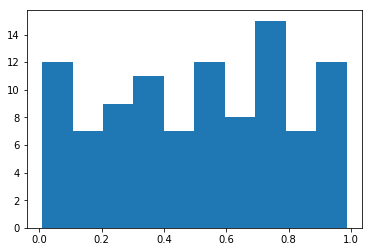

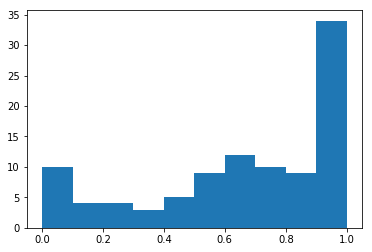

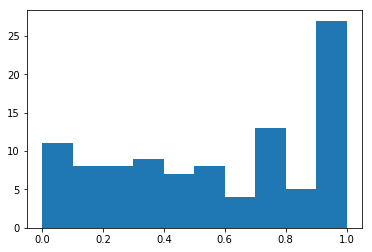

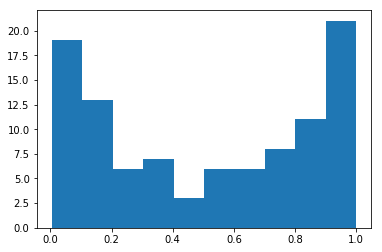

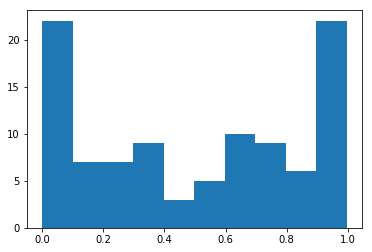

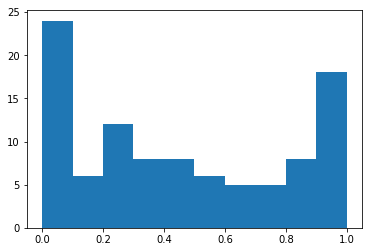

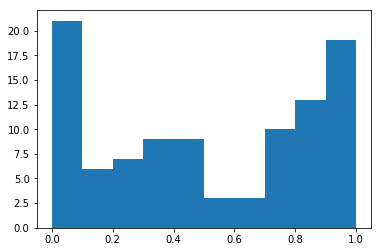

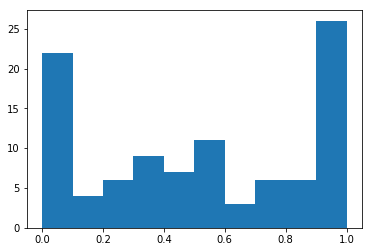

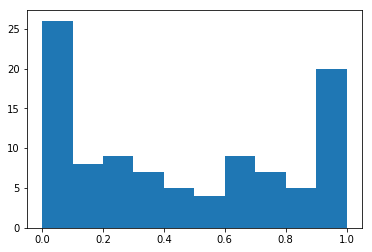

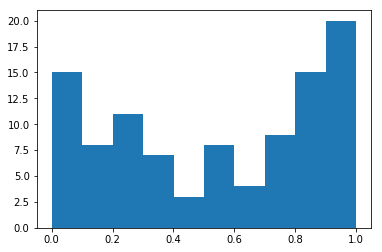

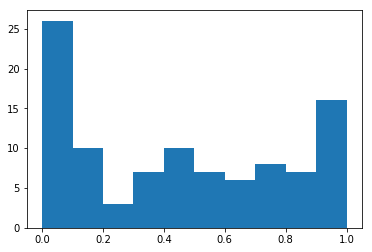

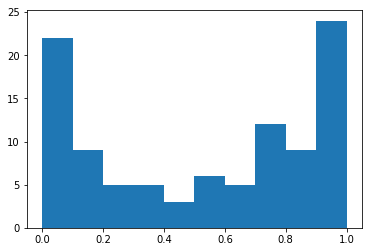

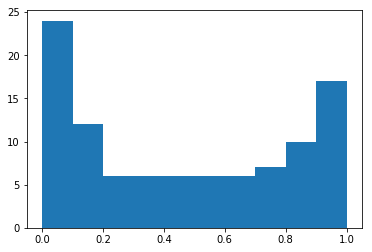

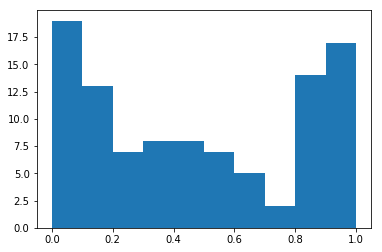

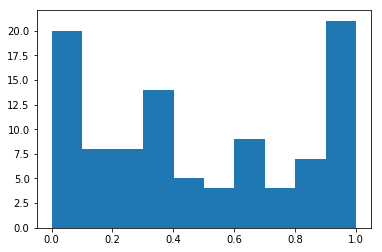

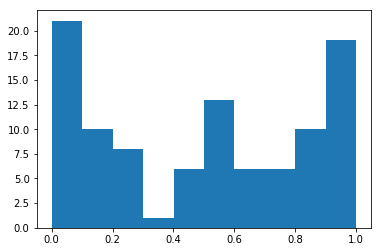

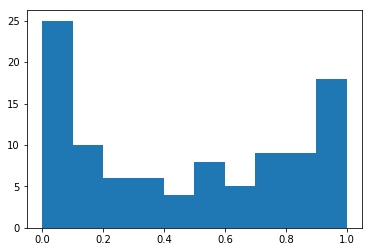

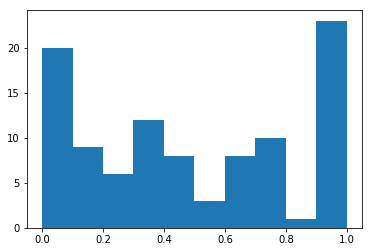

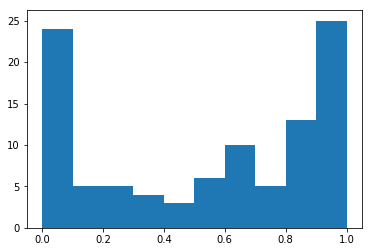

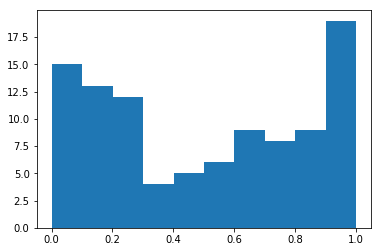

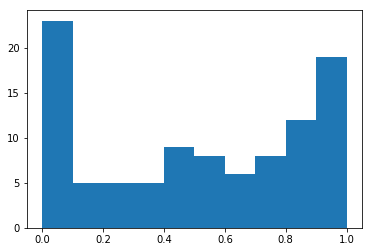

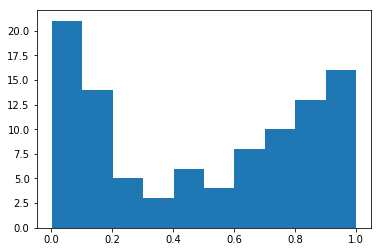

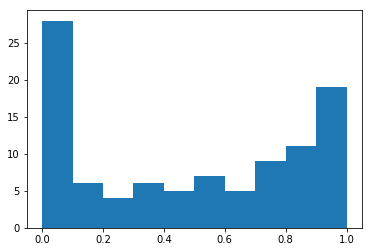

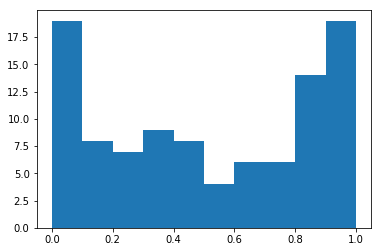

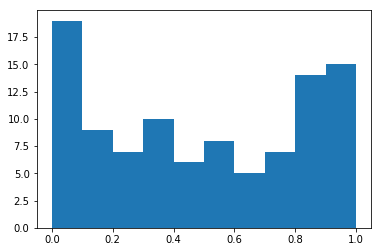

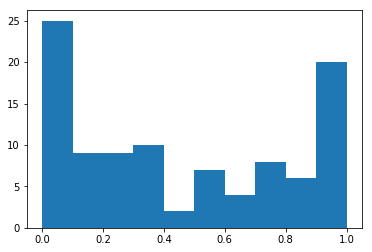

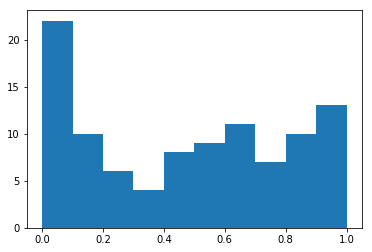

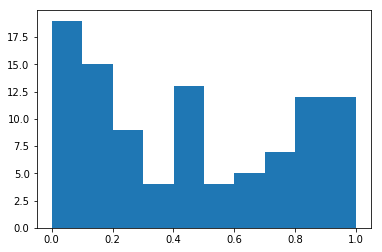

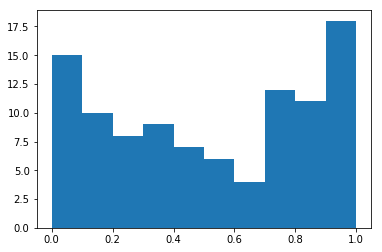

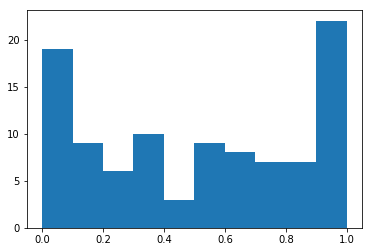

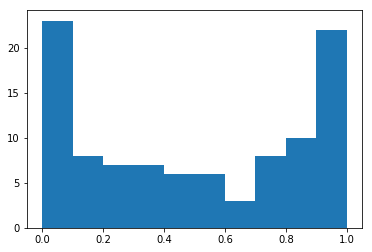

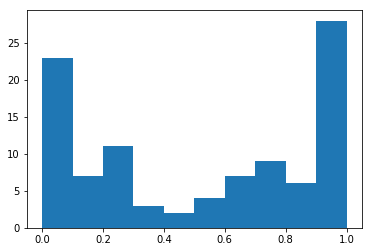

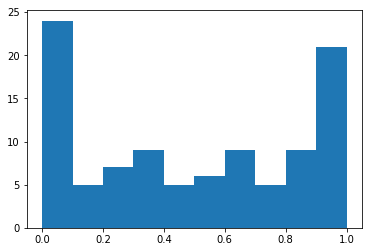

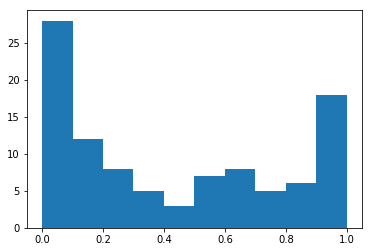

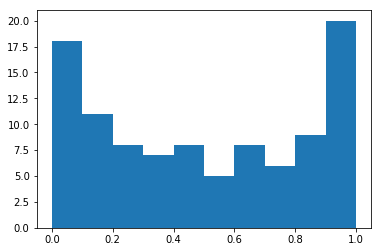

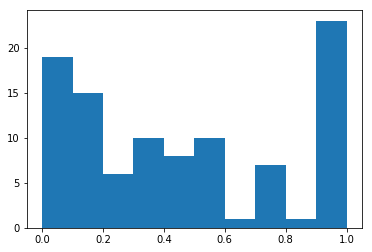

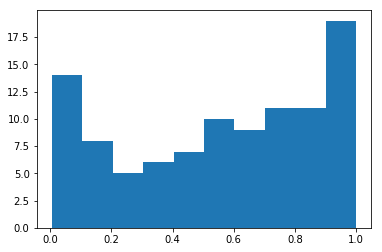

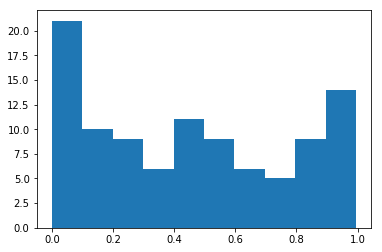

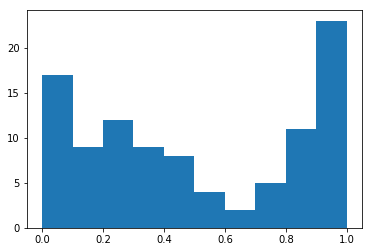

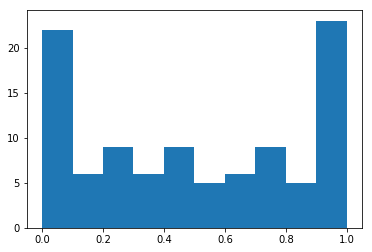

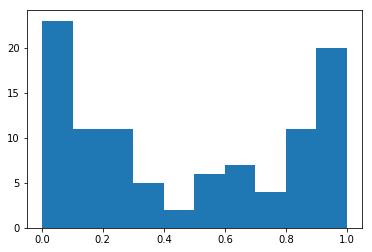

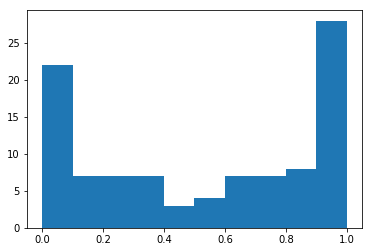

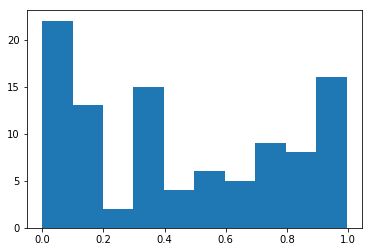

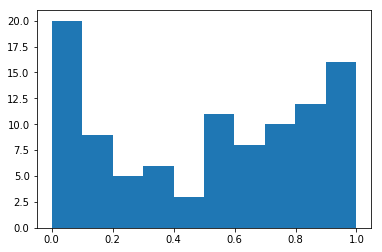

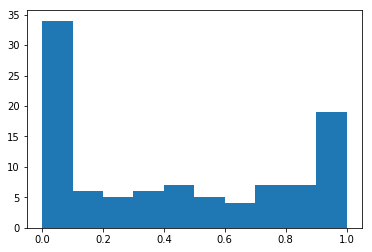

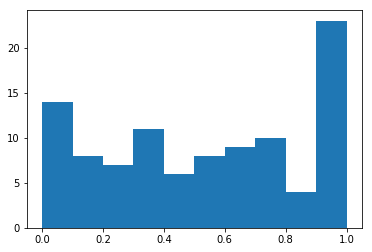

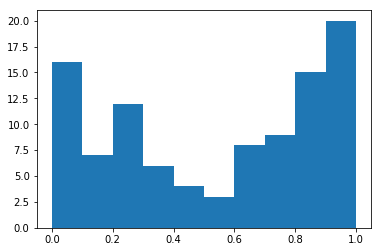

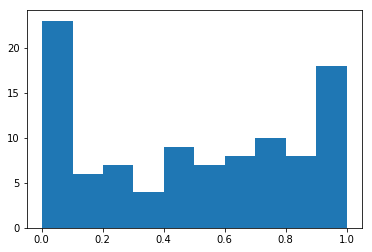

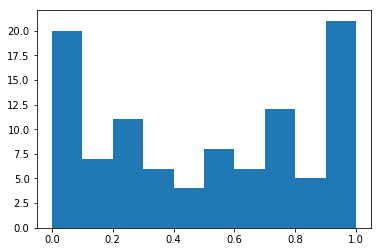

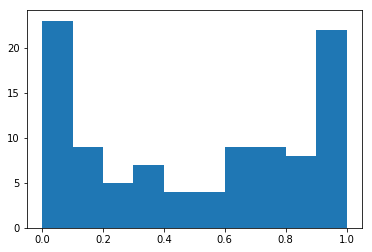

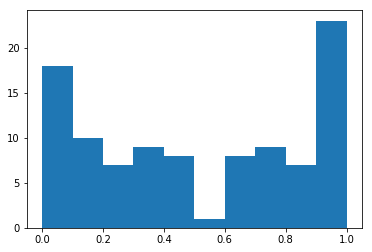

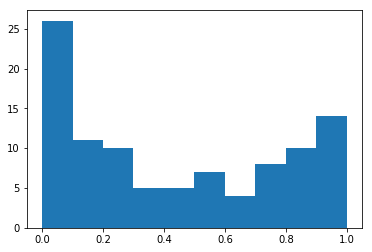

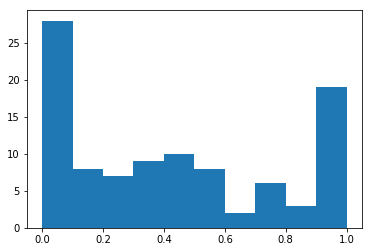

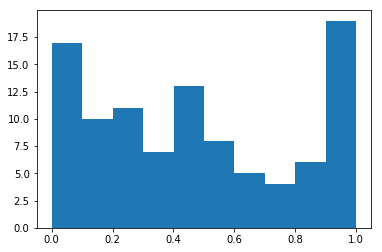

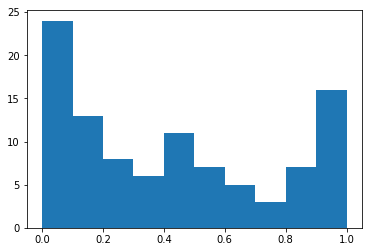

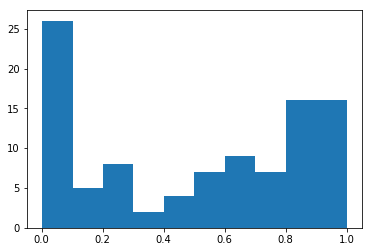

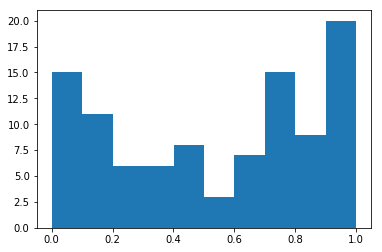

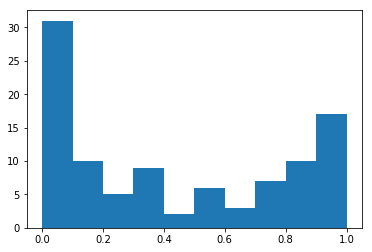

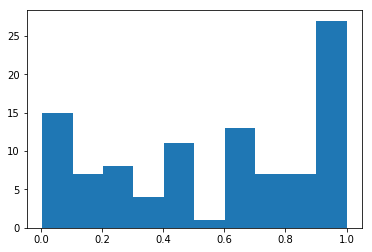

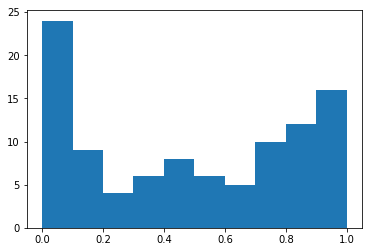

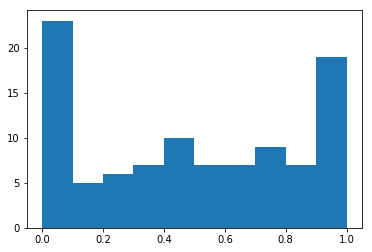

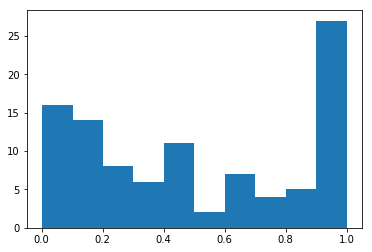

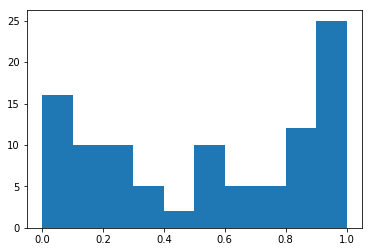

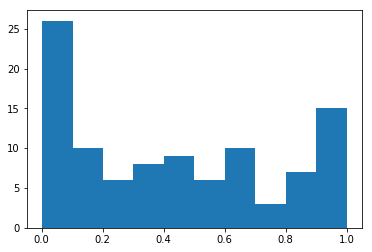

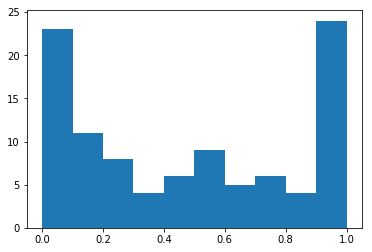

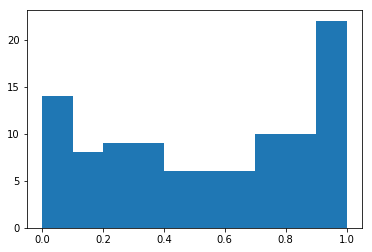

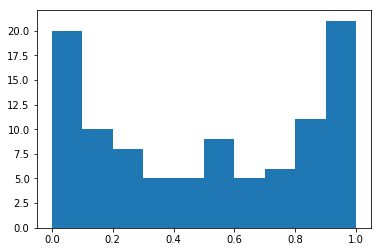

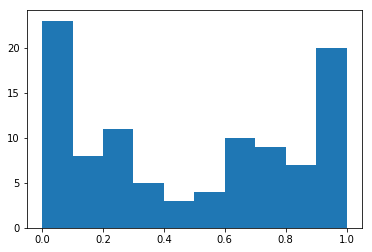

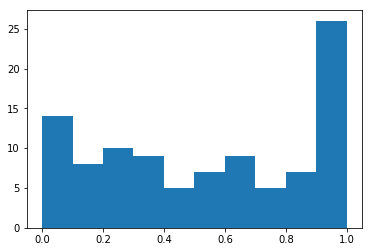

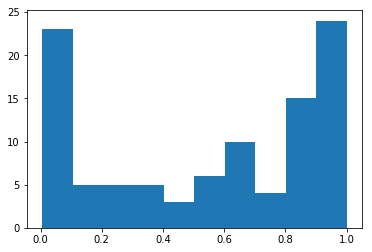

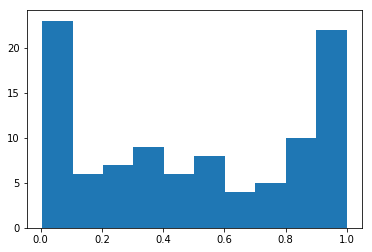

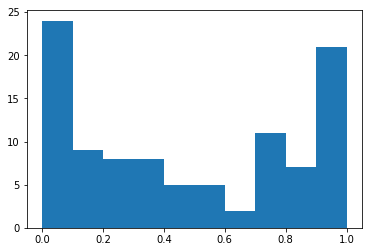

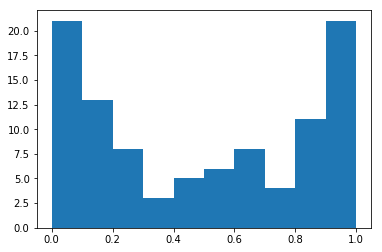

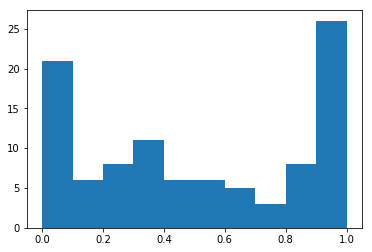

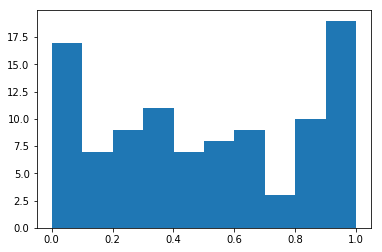

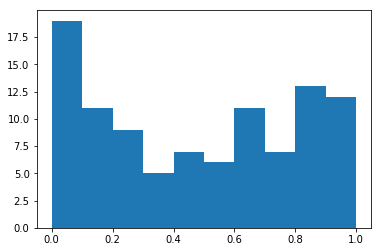

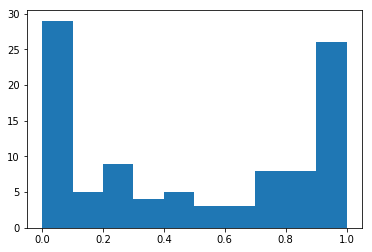

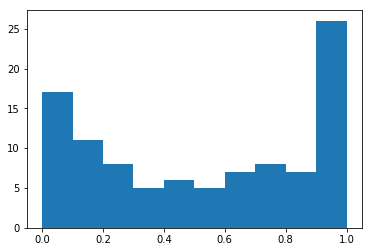

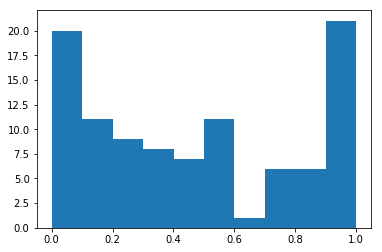

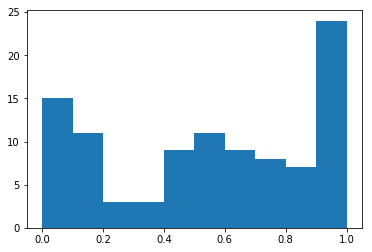

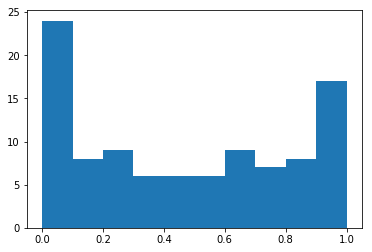

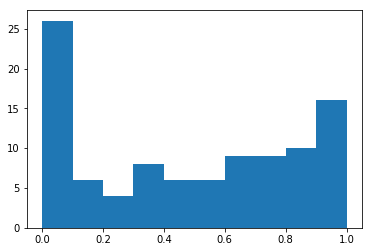

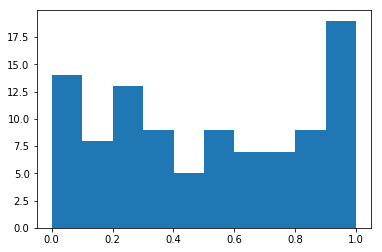

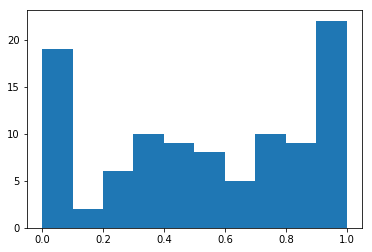

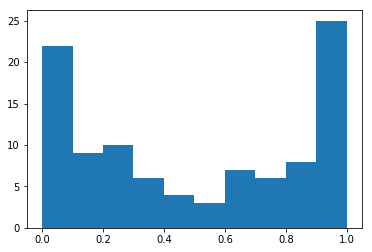

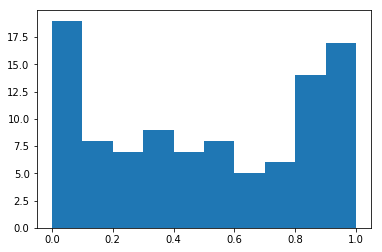

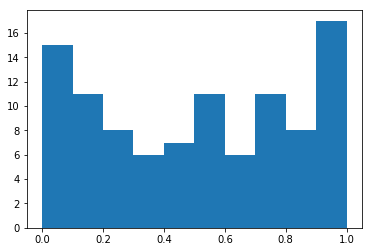

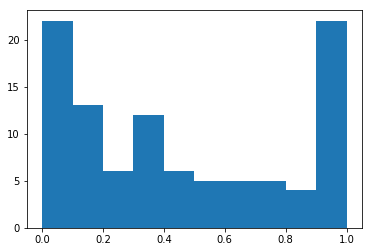

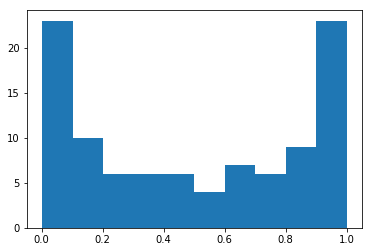

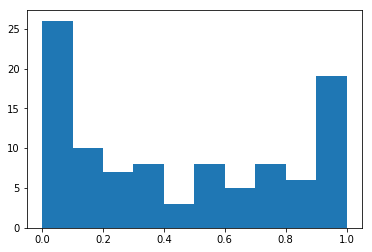

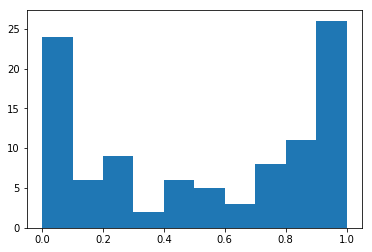

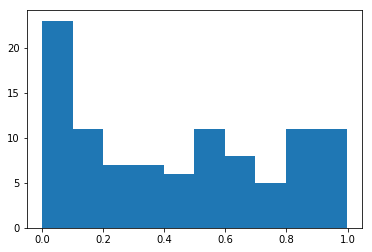

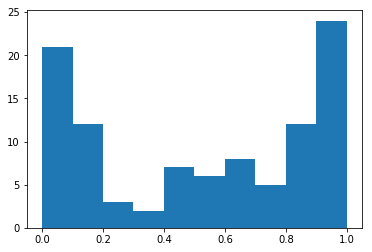

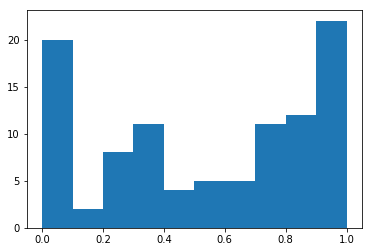

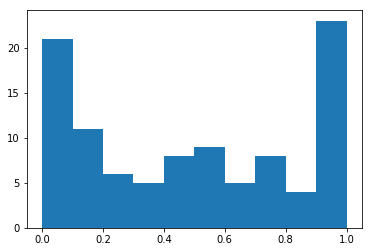

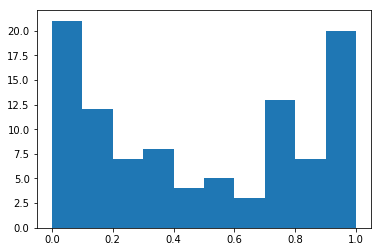

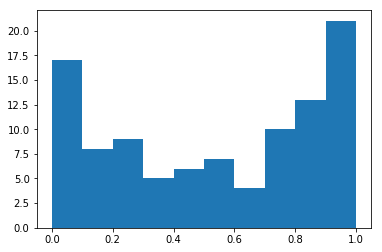

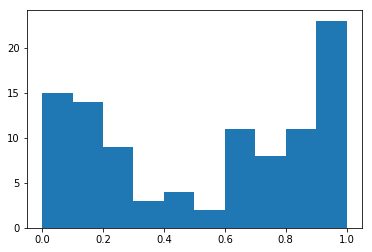

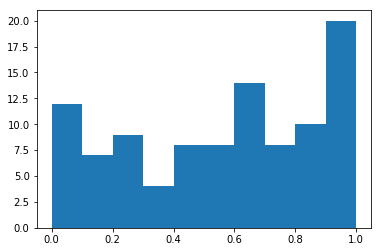

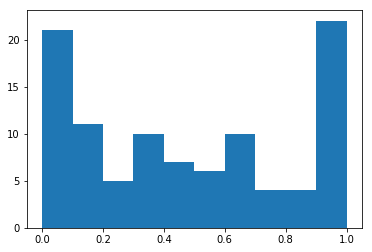

In [14]:
#

@njit
def nextx(x):
    ''' 
    This function takes as its argument the last x_t and outputs
    (x_t+1) according to the quadratic map.
    '''
    xnew = 4 * x * (1 - x) 
    return xnew

def generate(slength, numx):
    '''
    This function generates the numx time series of length slength
    following the quadratic map. The inital x values are drawn from 
    a uniform distribution on (0, 1)
    '''
    # Generate initial xs
    x = rand.uniform(0, 1, numx)
    # initialize timeseries (columns are individual series)
    seriesmat = np.zeros((numx, slength))
    for i in range(slength):
        for j in range(numx): 
            seriesmat[i, j] = x[j]
        x = nextx(x)
    return seriesmat

generate(20, 20)

@njit
def generate_jitted(slength, numx):
    '''
    This function generates the numx time series of length slength
    following the quadratic map. The inital x values are drawn from 
    a uniform distribution on (0, 1)
    '''
    # Generate initial xs
    x = rand.uniform(0, 1, numx)
    # initialize timeseries (columns are individual series)
    seriesmat = np.zeros((numx, slength))
    for i in range(slength):
        for j in range(numx): 
            seriesmat[i, j] = x[j]
        x = nextx(x)
    return seriesmat


print(generate_jitted(100, 100))

for i in range(100):
    plt.hist(generate_jitted(100, 100)[i])
    plt.show()

Hmm - the outcomes seem to cluster around the edges, at 0 and 1.

## Exercise 3

I will employ the following fact: *If $g$ is continuous at $\hat{x}$, there exists a ball $B_\delta(\hat{x})$ such that for $x \in B_\delta(\hat{x})$, $g$ is continuous at $x$*.

Now, if $g_t(x)$ converges to $g(\hat{x})$, it must eventually (say, for $t>T$) get inside this ball $B_\delta(\hat{x})$, so $t>T \implies g_t(x) \in B_\delta(\hat{x}) \implies g$ is continuous at $g_t(x)$. And as $t$ goes to infinity, we will always be inside this special ball where we can pass limits in and out of $g$. 

We can do the rest in one line.

$$
\hat{x} = lim_{t \to \infty} g_t(x) = g(lim_{t \to \infty} g_{t-1} (x)) = g(\hat{x})
$$

Good work on this one Jaehyung, Albi, and Alex!